# Introduction

# Literature Review

# Exploratory analysis

## Mathematical Models

The action of the network depends on several factor: (Michael B. Elowitz , Stanislas Leibler, 2000)
+ trancription rate on repressor concentration
+ tranlation rate
+ decay rates of protein and mRNA

In our model, the rate of change depends on three parts:
+ constant production: $\alpha_i$
+ natural degradation with rate: $\beta_i$
+ interaction between three genes: hill function $h(X_i)=\frac{K_i\theta_i^n}{\theta_i^n+X_i^n}$

rate of change = production - degradation + interactions

Following the paper 'Dynamics in Genetic Networks', Roderick Edwards, Leon Glass (2015)

$$\dot{X}_1  = \alpha_1^0-\beta_1X_1+\frac{K_1\theta_3^n}{\theta_3^n+X_3^n}$$
$$\dot{X}_2  = \alpha_2^0-\beta_2X_2+\frac{K_2\theta_1^n}{\theta_1^n+X_1^n}$$
$$\dot{X}_3  = \alpha_3^0-\beta_3X_3+\frac{K_3\theta_2^n}{\theta_2^n+X_2^n}$$

## Nondimensionlization

\begin{align}
\frac{dm_i}{dt}=\alpha_0-_i+\frac{\alpha_1}{1+p_{j_i}^n}, j_1=3, j_2 =1, j_3=2
\end{align}

$$\frac{dp_i}{dt}=-\beta(p_i-m_i)$$

Considering 3 genes networks

$$m_1(0)=1,5, m_2(0)=1.0, m_3(0)=1.3$$

Plot for protein

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interactive
%matplotlib inline

def dxdt(S,t,n,alpha_0,alpha_1,beta):
    m1,m2,m3,p1,p2,p3 = S
    return [alpha_0-m1+alpha_1/(1+p3**n),alpha_0-m2+alpha_1/(1+p1**n),alpha_0-m3+alpha_1/(1+p2**n),-beta*(p1-m1),-beta*(p2-m2), -beta*(p3-m3)]

def f(p1_0,p2_0,p3_0,n,alpha_0,alpha_1,beta):
    S_0=(1.5,1.0,1.3,p1_0,p2_0,p3_0)
    t = np.linspace(0,100,1000)
    sol = odeint(dxdt,S_0,t,(n,alpha_0,alpha_1,beta))
    m1 = sol.T[0]
    m2 = sol.T[1]
    m3 = sol.T[2]
    p1 = sol.T[3] 
    p2 = sol.T[4] 
    p3 = sol.T[5] 
    plt.plot(t,p1,'b',label='$p_1$')
    plt.plot(t,p2,'g',label='$p_2$')
    plt.plot(t,p3,'k',label='$p_3$')
    plt.xlabel('t')
    plt.ylabel('Protein per cell')
    plt.legend(loc='best')
    plt.show()

interactive_plot = interactive(f,p1_0=(0,30,0.01),p2_0=(0,30,0.01),p3_0=(0,30,0.01),n=(1,100,0.1),alpha_0=(0,10,0.01),alpha_1=(0.1,100,0.1),beta=(0,100,0.1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=15.0, description='p1_0', max=30.0, step=0.01), FloatSlider(value=15.0…

Computer simulation of oscillation

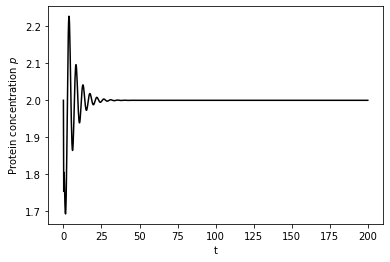

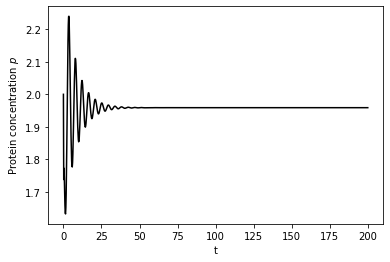

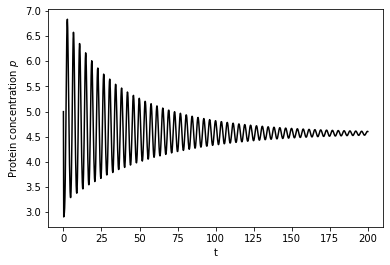

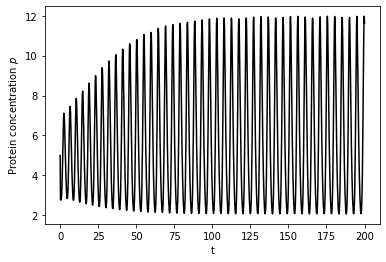

In [157]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

def dxdt(S,t,n,alpha_0,alpha_1,beta):
    m1,m2,m3,p1,p2,p3 = S
    return [alpha_0-m1+alpha_1/(1+p3**n),alpha_0-m2+alpha_1/(1+p1**n),alpha_0-m3+alpha_1/(1+p2**n),-beta*(p1-m1),-beta*(p2-m2), -beta*(p3-m3)]

def f(p1_0,p2_0,p3_0,n,alpha_0,alpha_1,beta):
    S_0=(1.5,1.0,1.3,p1_0,p2_0,p3_0)
    t = np.linspace(0,200,1000)
    sol = odeint(dxdt,S_0,t,(n,alpha_0,alpha_1,beta))
    m1 = sol.T[0]
    m2 = sol.T[1]
    m3 = sol.T[2]
    p1 = sol.T[3] 
    p2 = sol.T[4] 
    p3 = sol.T[5] 
    plt.plot(t,p1,'k')
    plt.xlabel('t')
    plt.ylabel('Protein concentration $p$')
    plt.show()

    
f(2,1,1,2,0,10,100)
f(2,1,1,2.1,0,10,100)    
f(5,1,1,2,0,100,100)
f(5,1,1,2.1,0,100,100)


Plot for mRNA

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interactive
%matplotlib inline

def dxdt(S,t,n,alpha_0,alpha_1,beta):
    m1,m2,m3,p1,p2,p3 = S
    return [alpha_0-m1+alpha_1/(1+p3**n),alpha_0-m2+alpha_1/(1+p1**n),alpha_0-m3+alpha_1/(1+p2**n),-beta*(p1-m1),-beta*(p2-m2), -beta*(p3-m3)]

def f(p1_0,p2_0,p3_0,n,alpha_0,alpha_1,beta):
    S_0=(1.5,1.0,1.3,p1_0,p2_0,p3_0)
    t = np.linspace(0,100,1000)
    sol = odeint(dxdt,S_0,t,(n,alpha_0,alpha_1,beta))
    m1 = sol.T[0]
    m2 = sol.T[1]
    m3 = sol.T[2]
    p1 = sol.T[3] 
    p2 = sol.T[4] 
    p3 = sol.T[5] 
    plt.plot(t,m1,'b',label='$m_1$')
    plt.plot(t,m2,'g',label='$m_2$')
    #plt.plot(t,m3,'k',label='$m_3$')
    plt.xlabel('t')
    plt.ylabel('Protein per cell')
    plt.legend(loc='best')
    plt.show()

interactive_plot = interactive(f,p1_0=(0,30,0.01),p2_0=(0,30,0.01),p3_0=(0,30,0.01),n=(1,100,0.1),alpha_0=(0,10,0.01),alpha_1=(0.1,100,0.1),beta=(0,100,0.1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=15.0, description='p1_0', max=30.0, step=0.01), FloatSlider(value=15.0…

Uniqueness of Fixed Point


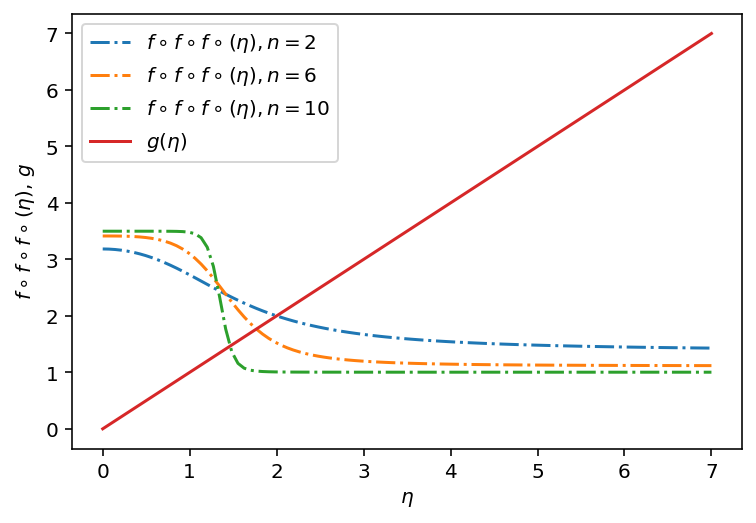

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
alpha_0 = 1
alpha_1 = 5
f1 = lambda t: alpha_0 + alpha_1 / (1 + t ** 2)
f2 = lambda t: alpha_0 + alpha_1 / (1+ t ** 3)
f3 = lambda t: alpha_0 + alpha_1 / (1+ t ** 6)
t = np.linspace(0,7,100)
y_1 = f1(f1(f1(t)))
y_2 = f2(f2(f2(t)))
y_3 = f3(f3(f3(t)))
g = t

plt.plot(t,y_1,linestyle='-.',label='$f \circ f \circ f \circ (\eta),n=2$')
plt.plot(t,y_2,linestyle='-.',label='$f \circ f \circ f \circ (\eta),n=6$')
plt.plot(t,y_3,linestyle='-.',label='$f \circ f \circ f \circ (\eta),n=10$')
plt.plot(t,g,label='$g(\eta)$')
plt.xlabel('$\eta$')
plt.ylabel('$f \circ f \circ f \circ (\eta)$, $g$')
plt.legend(loc='best')
plt.savefig('Fixedpoint.pdf',dpi=1000)

Hill function

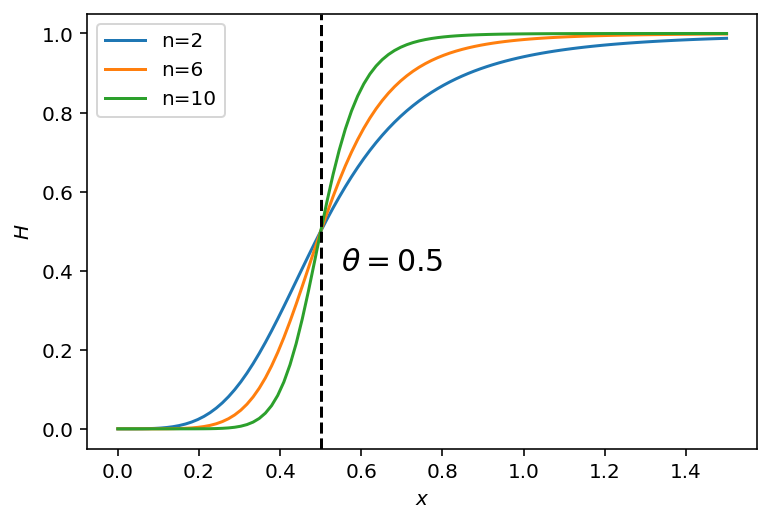

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def f(x,n,theta):
    return x**n/(theta**n+x**n)

def f_bar(x,n,theta):
    return theta**n/(theta**n+x**n)


x = np.linspace(0,1.5,100)

plt.plot(x,f(x,4,0.5),label='n=2')
plt.plot(x,f(x,6,0.5),label='n=6')
plt.plot(x,f(x,10,0.5),label='n=10')
plt.axvline(0.5,color='k', linestyle='--')
plt.text(0.55, 0.4, r"$\theta=0.5$", fontsize = 15)
plt.legend(loc='best')
plt.xlabel('$x$')
plt.ylabel('$H$')
plt.savefig('Hillfunction.pdf',dpi=1000)

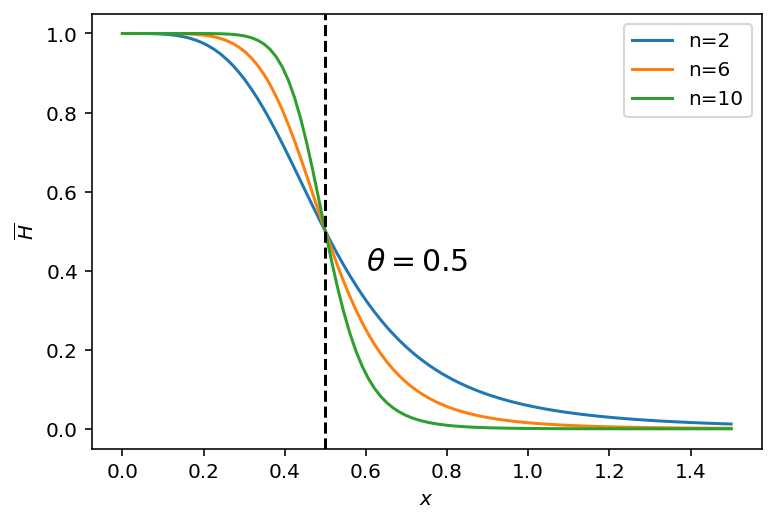

In [21]:
plt.plot(x,f_bar(x,4,0.5),label='n=2')
plt.plot(x,f_bar(x,6,0.5),label='n=6')
plt.plot(x,f_bar(x,10,0.5),label='n=10')
plt.axvline(0.5,color='k', linestyle='--')
plt.text(0.6, 0.4, r"$\theta=0.5$", fontsize = 15)
plt.legend(loc='best')
plt.xlabel('$x$')
plt.ylabel('$\overline{H}$')
plt.savefig('Hillfunction_bar.pdf',dpi=1000)

$r_0=\sqrt[n]{\frac{2}{n-2}}$

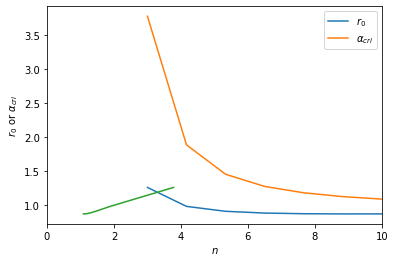

In [68]:
import numpy as np
import matplotlib.pyplot as plt
n = np.linspace(3,10,7)
r_0 = [0,0,0,0,0,0,0]
alpha_bif = [0,0,0,0,0,0,0]

for i in range(len(n)):
    r_0[i] = (2/(n[i]-2)) ** (1 / n[i])
    alpha_bif[i] = r_0[i] ** (n[i]+1) + r_0[i]
plt.plot(n,r_0,label='$r_0$')
plt.plot(n,alpha_bif,label=r'$\alpha_{cri}$')
plt.xlim((0, 10))
plt.xlabel('$n$')
plt.ylabel(r'$r_0$ or $\alpha_{cri}$')
plt.legend(loc='best')

Plot alpha vs r (numerical method for finding $\alpha_{bif}=r_0^{n+1}+r_0$)

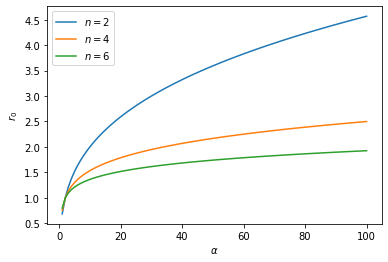

In [2]:
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt


def func_root(r_0,alpha,n):
    return alpha-r_0 ** (n+1)-r_0

alpha=np.linspace(1,100,100)
sol1=np.zeros(len(alpha))

for i in range(0,100):
    sol1[i]= optimize.bisect(func_root,0,alpha[i],args=(alpha[i],2))

sol2=np.zeros(len(alpha))
for i in range(0,100):
    sol2[i]= optimize.bisect(func_root,0,alpha[i],args=(alpha[i],4))

sol3=np.zeros(len(alpha))
for i in range(0,100):
    sol3[i]= optimize.bisect(func_root,0,alpha[i],args=(alpha[i],6))


plt.plot(alpha,sol1,label='$n=2$')
plt.plot(alpha,sol2,label='$n=4$')
plt.plot(alpha,sol3,label='$n=6$')
plt.xlabel(r'$\alpha$')
plt.ylabel('$r_0$')
plt.legend(loc='best')
plt.savefig('Bisectionmethod.pdf',dpi=1000)

$$\alpha-(R^n+1)(R-\alpha_0)$$

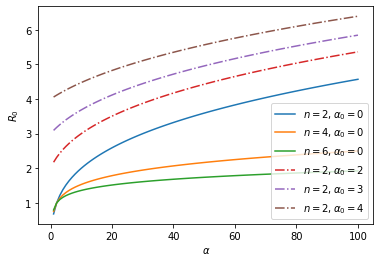

In [257]:
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt


def func_root(R_0,alpha,n,alpha_0):
    return alpha-(R_0**n+1)*(R_0-alpha_0)

alpha=np.linspace(1,100,100)
sol1=np.zeros(len(alpha))

for i in range(0,100):
    sol1[i]= optimize.bisect(func_root,0,alpha[i]+2,args=(alpha[i],2,2))

sol2=np.zeros(len(alpha))
for i in range(0,100):
    sol2[i]= optimize.bisect(func_root,0,alpha[i]+3,args=(alpha[i],2,3))

sol3=np.zeros(len(alpha))
for i in range(0,100):
    sol3[i]= optimize.bisect(func_root,0,alpha[i]+4,args=(alpha[i],2,4))

    
sol4=np.zeros(len(alpha))    
for i in range(0,100):
    sol4[i]= optimize.bisect(func_root,0,alpha[i],args=(alpha[i],2,0))

sol5=np.zeros(len(alpha))
for i in range(0,100):
    sol5[i]= optimize.bisect(func_root,0,alpha[i],args=(alpha[i],4,0))

sol6=np.zeros(len(alpha))
for i in range(0,100):
    sol6[i]= optimize.bisect(func_root,0,alpha[i],args=(alpha[i],6,0))
    


plt.plot(alpha,sol4,label=r'$n=2,\alpha_0=0$')
plt.plot(alpha,sol5,label=r'$n=4,\alpha_0=0$')
plt.plot(alpha,sol6,label=r'$n=6,\alpha_0=0$')

plt.plot(alpha,sol1,'-.',label=r'$n=2,\alpha_0=2$')
plt.plot(alpha,sol2,'-.',label=r'$n=2,\alpha_0=3$')
plt.plot(alpha,sol3,'-.',label=r'$n=2,\alpha_0=4$')


#plt.plot(alpha,sol4,label='$n=2,\alpha_0=2$')
plt.xlabel(r'$\alpha$')
plt.ylabel('$R_0$')
plt.legend(loc='best')
plt.savefig('Bisectionmethod2.pdf',dpi=1000)

In [262]:
sol5


array([0.75487767, 1.        , 1.13299757, 1.22633935, 1.29915279,
       1.35930409, 1.41081385, 1.45602338, 1.49642066, 1.5330128 ,
       1.56651456, 1.59745246, 1.62622607, 1.65314619, 1.67845959,
       1.70236561, 1.72502775, 1.74658185, 1.76714205, 1.78680528,
       1.80565453, 1.82376149, 1.8411885 , 1.85799015, 1.87421452,
       1.88990419, 1.90509705, 1.91982699, 1.93412445, 1.94801687,
       1.96152907, 1.9746836 , 1.98750099, 2.        , 2.01219783,
       2.02411027, 2.03575185, 2.04713601, 2.05827516, 2.06918082,
       2.07986368, 2.09033369, 2.10060013, 2.11067166, 2.1205564 ,
       2.13026194, 2.1397954 , 2.14916348, 2.15837248, 2.16742833,
       2.17633663, 2.18510267, 2.19373144, 2.20222768, 2.21059586,
       2.21884024, 2.22696485, 2.23497352, 2.24286991, 2.25065749,
       2.25833957, 2.26591929, 2.27339968, 2.2807836 , 2.2880738 ,
       2.29527292, 2.30238346, 2.30940784, 2.31634836, 2.32320725,
       2.32998662, 2.33668851, 2.34331489, 2.34986763, 2.35634

$$\alpha=\frac{n}{2}\left(\frac{n}{2}-1\right)^{-\frac{n+1}{n}}$$

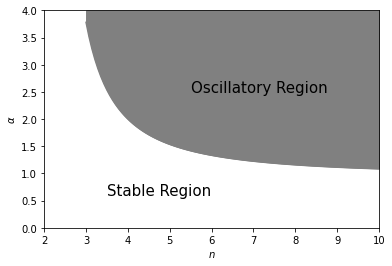

In [55]:
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt


def func(n):
    return (n / 2) * (n / 2 - 1) ** (-(n+1) / n)


    
n=np.linspace(3,10,100)
sol=func(n)
plt.plot(n,sol,'grey')
plt.xlabel('$n$')
plt.ylabel(r'$\alpha$')
plt.xlim([2,10])
plt.ylim([0,4])
plt.fill_between(n,sol, 4, color='grey')
plt.text(5.5, 2.5, "Oscillatory Region", fontsize = 15)
plt.text(3.5, 0.6, "Stable Region", fontsize = 15)
plt.savefig('OscillatoryRegionplot.pdf',dpi=1000)

$$\frac{(\beta+1)^2}{\beta}=\frac{3\Gamma^2}{4+2\Gamma}$$

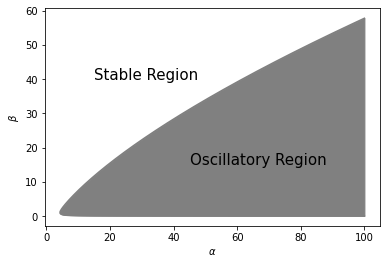

In [330]:
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt

def func_root(R_0,alpha,n,alpha_0):
    return alpha-(R_0**n+1)*(R_0-alpha_0)

alpha=np.linspace(1,100,2000)
#Plot the parameter space
def bifurcation1(n,alpha):
    sol1=np.zeros(len(alpha))    
    for i in range(len(alpha)):
        sol1[i]= optimize.bisect(func_root,0,alpha[i],args=(alpha[i],2,0))
        
    beta=np.zeros(len(alpha))
    Gamma = np.zeros(len(alpha))
    for i in range(len(alpha)):
        R_0=sol1
        Gamma=-(alpha[i]*n*R_0[i]**(n-1))/(1+R_0[i]**n)**2
        S=9*Gamma**2-24*Gamma-48
        if S < 0:
            beta[i]=np.nan
        else:
            beta[i]=(3*Gamma**2-4*Gamma-8)/(4*Gamma+8)+Gamma*(np.sqrt(S)/(4*Gamma+8))
    return beta

def bifurcation2(n,alpha):
    sol1=np.zeros(len(alpha))    
    for i in range(len(alpha)):
        sol1[i]= optimize.bisect(func_root,0,alpha[i],args=(alpha[i],2,0))
    beta=np.zeros(len(alpha))
    Gamma = np.zeros(len(alpha))
    for i in range(len(alpha)):
        R_0=sol1
        Gamma=-(alpha[i]*n*R_0[i]**(n-1))/(1+R_0[i]**n)**2
        S=9*Gamma**2-24*Gamma-48
        if S < 0:
            beta[i]=np.nan
        else:
            beta[i]=(3*Gamma**2-4*Gamma-8)/(4*Gamma+8)-Gamma*(np.sqrt(S)/(4*Gamma+8))
    return beta

n=2
plt.plot(alpha,bifurcation1(n,alpha),'grey')
plt.plot(alpha,bifurcation2(n,alpha),'grey')
plt.fill_between(alpha,bifurcation2(n,alpha),bifurcation1(n,alpha), color='grey')
#plt.fill_between(alpha,bifurcation2(n,alpha),bifurcation1(n,alpha), color='grey')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')
plt.text(45, 15, "Oscillatory Region", fontsize = 15)
plt.text(15, 40, "Stable Region", fontsize = 15)
plt.savefig('OscillatoryRegionplot2.pdf',dpi=1000)

Text(0, 0.5, '$\\beta$')

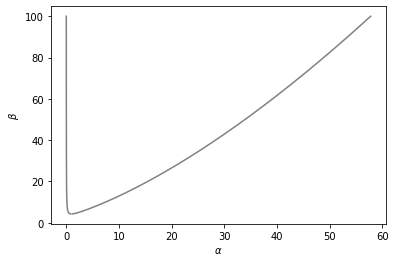

In [317]:
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt

def func_root(R_0,alpha,n,alpha_0):
    return alpha-(R_0**n+1)*(R_0-alpha_0)

alpha=np.linspace(1,100,2000)
#Plot the parameter space
def bifurcation1(n,alpha):
    sol1=np.zeros(len(alpha))    
    for i in range(len(alpha)):
        sol1[i]= optimize.bisect(func_root,0,alpha[i],args=(alpha[i],2,0))
        
    beta=np.zeros(len(alpha))
    Gamma = np.zeros(len(alpha))
    for i in range(len(alpha)):
        R_0=sol1
        Gamma=-(alpha[i]*n*R_0[i]**(n-1))/(1+R_0[i]**n)**2
        S=9*Gamma**2-24*Gamma-48
        if S < 0:
            beta[i]=np.nan
        else:
            beta[i]=(3*Gamma**2-4*Gamma-8)/(4*Gamma+8)+Gamma*(np.sqrt(S)/(4*Gamma+8))
    return beta

def bifurcation2(n,alpha):
    sol1=np.zeros(len(alpha))    
    for i in range(len(alpha)):
        sol1[i]= optimize.bisect(func_root,0,alpha[i],args=(alpha[i],2,0))
    beta=np.zeros(len(alpha))
    Gamma = np.zeros(len(alpha))
    for i in range(len(alpha)):
        R_0=sol1
        Gamma=-(alpha[i]*n*R_0[i]**(n-1))/(1+R_0[i]**n)**2
        S=9*Gamma**2-24*Gamma-48
        if S < 0:
            beta[i]=np.nan
        else:
            beta[i]=(3*Gamma**2-4*Gamma-8)/(4*Gamma+8)-Gamma*(np.sqrt(S)/(4*Gamma+8))
    return beta

n=2
plt.plot(bifurcation1(n,alpha),alpha,'grey')
plt.plot(bifurcation2(n,alpha),alpha,'grey')
#plt.fill_between(bifurcation1(n,alpha),alpha,bifurcation2(n,alpha), color='grey')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\beta$')

Reduced model
plot for protein

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interactive
%matplotlib inline

def dxdt(S,t,n,alpha):
    x, y, z = S
    return [alpha/(1+y**n)-x, alpha/(1+z**n)-y, alpha/(1+x**n)-z]

def f(x,y,z,n,alpha):
    S_0=(1.5,1.0,1.3)
    t = np.linspace(0,100,1000)
    sol = odeint(dxdt,S_0,t,(n,alpha))
    x = sol.T[0]
    y = sol.T[1]
    z = sol.T[2]
    plt.plot(t,x,'b',label='$x$')
    plt.plot(t,y,'g',label='$y$')
    plt.plot(t,z,'k',label='$z$')
    plt.xlabel('t')
    plt.ylabel('Protein per cell')
    plt.legend(loc='best')
    plt.show()

interactive_plot = interactive(f,x=(0,30,0.01),y=(0,30,0.01),z=(0,30,0.01),n=(1,100,0.1),alpha=(0.1,100,0.1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=15.0, description='x', max=30.0, step=0.01), FloatSlider(value=15.0, d…

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from ipywidgets import interactive
%matplotlib inline

def dxdt(S,t,n,alpha):
    x, y, z = S
    return [alpha/(1+y**n)-x, alpha/(1+z**n)-y, alpha/(1+x**n)-z]

def f(x,y,z,n,alpha):
    S_0=(1.5,1.0,1.3)
    t = np.linspace(0,100,1000)
    sol = odeint(dxdt,S_0,t,(n,alpha))
    x = sol.T[0] / alpha
    y = sol.T[1] / alpha
    z = sol.T[2] / alpha
    plt.plot(t,x,'b',label='$x$')
    plt.plot(t,y,'g',label='$y$')
    plt.plot(t,z,'k',label='$z$')
    plt.xlabel('t')
    plt.ylabel('Protein per cell')
    plt.legend(loc='best')
    plt.show()

interactive_plot = interactive(f,x=(0,30,0.01),y=(0,30,0.01),z=(0,30,0.01),n=(1,100,0.1),alpha=(0.1,100,0.1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=15.0, description='x', max=30.0, step=0.01), FloatSlider(value=15.0, d…

In [110]:
range(len(alpha))


range(0, 1000)